In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
import datetime
import matplotlib as mpl

#%matplotlib widget
    #https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-europe-air-quality-forecasts?tab=form

In [3]:
mpl.rcParams['animation.embed_limit'] = 2**128
mpl.rc('font', size=16) 

fn="data2.nc"
fn="data_march.nc"#pm10_conc
fn="data_months_f_m_a_co2.nc"#ecff_conc
ds = nc.Dataset(fn)
lon=ds['longitude'][:]
lat=ds['latitude'][:]

time=[datetime.datetime(2020, 2, 1)+datetime.timedelta(hours = i) for i in range(ds['time'].shape[0])]
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    long_name: longitude
    units: degrees_east
unlimited dimensions: 
current shape = (98,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    long_name: latitude
    units: degrees_north
unlimited dimensions: 
current shape = (80,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 level(level)
    long_name: level
    units: m
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    long_name: ANALYSIS time from 20200204
    units: hours
unlimited dimensions: time
current shape = (2088,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 ecff_conc(time, level, latitude, longitude)
    _FillValue: -999.0
    species: PM2.5 Elemental

<ipython-input-3-d2c464958518>:13: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(var)


In [4]:
alldata=[]
for t in range(ds['time'].shape[0]):
    alldata.append(ds['ecff_conc'][t,0,:,:])

In [5]:
fig = plt.figure()

def animate(i):
    plt.clf() 
    data=alldata[i]#ds['co_conc'][i,0,:,:]
    print(i/ds['time'].shape[0]*100)
    sns.heatmap(data,vmin=0, vmax=25,center=1,square=True,xticklabels=ticks(lon), yticklabels=ticks(lat))
    fig.set_size_inches(11,8)
    plt.title(time[i])
    

anim = animation.FuncAnimation(fig, animate, frames=24, repeat = False)
#HTML(anim.to_jshtml())

<Figure size 432x288 with 0 Axes>

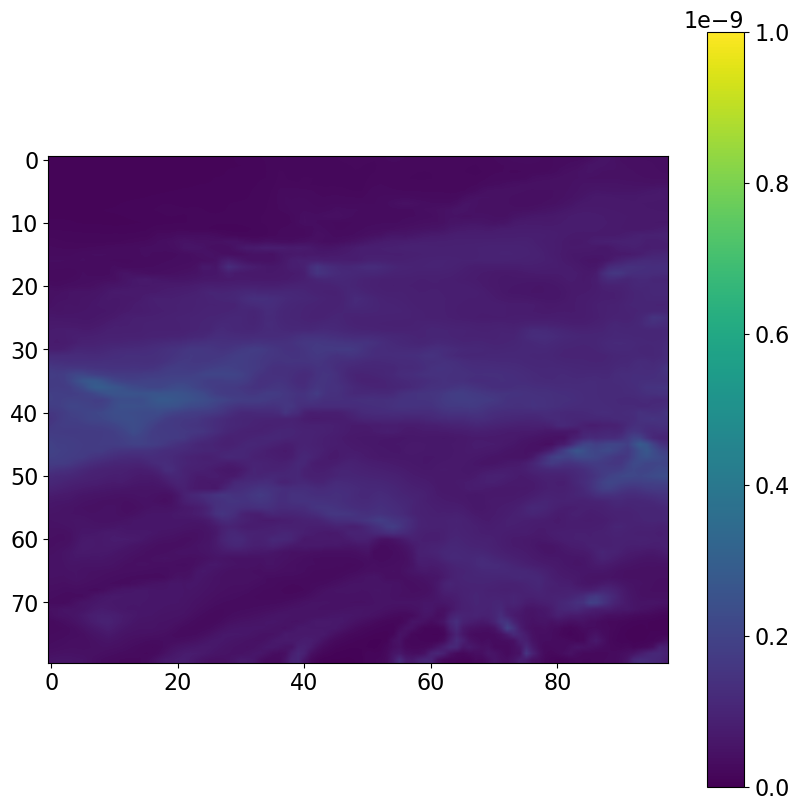

In [6]:
         # controls default text sizes

# color1 = colorConverter.to_rgba('white',alpha=0.0)
# color2 = colorConverter.to_rgba('black',alpha=0.8)

# cmap = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',[color1,color2],256)
# cmap._init()

# alphas = np.linspace(0, 0.2, cmap.N+3)
# cmap._lut[:,-1] = alphas

time24=[datetime.datetime(2020, 2, 1)+datetime.timedelta(hours = 24*i) for i in range(int(ds['time'].shape[0]/24))]

maximum=1e-9
fig, ax = plt.subplots(1,1,dpi=100) 
img = plt.imread("map.jpg")
#ax.imshow(img)
im=plt.imshow(alldata[0],vmin=0, vmax=maximum,interpolation='bilinear')
plt.colorbar()
fig.set_size_inches(10,10)

#plt.axis('off')
def animate(i):
    data=alldata[i*24+12]#ds['co_conc'][i,0,:,:]
    print(i/length*100,end="\r")
    im.set_array(data)
    fig.suptitle(f"PM2.5 Elemental Carbon from Anthropogenic Fossil Fuels \n Cut at:{maximum}, elevation:0\n Zeit:{time[i]}")
    #plt.draw()
length=int(ds['time'].shape[0]/24)-1
#ds['time'].shape[0]
anim = animation.FuncAnimation(fig, animate, frames=length, repeat = False)
#HTML(anim.to_jshtml())
#HTML(anim.to_html5_video())


In [7]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Moin'), bitrate=2000)
#anim.save('im12.mp4', writer=writer)


In [8]:

tmax=ds['time'].shape[0]
for t in range(10):
    #data=ds['co_conc'][t,0,:,:]
    #sns.heatmap(data,vmin=0, vmax=400,center=1)
    plt.show()

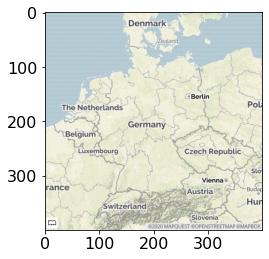

In [9]:
import matplotlib.pyplot as plt
img = plt.imread("map.jpg")
fig, ax = plt.subplots()
ax.imshow(img)

In [10]:
def ticks(arr):
    k=5
    val=[]
    for i in range(int(len(arr)/k)):
        val.append(str(arr[i*k]))
        val.append("")
        val.append("")
        val.append("")
        val.append("")
    
    while(len(val)<len(arr)):
        val.append("")
    return val
    

In [18]:
key1="PBsWy3aVNWtVp3s"
key2="LaBGrRut5yVjcbov4"
key=key1+key2
link=fr"""https://open.mapquestapi.com/staticmap/v5/map?key={key}&boundingBox={lat[0]},{lon[0]},{lat[-1]},{lon[-1]}&size=@2x&locations={lat[0]},{lon[0]}||{lat[-1]},{lon[-1]}&defaultMarker=via-sm"""
print(link)
# import urllib.request

# urllib.request.urlretrieve(link, "map.jpg")

https://open.mapquestapi.com/staticmap/v5/map?key=PBsWy3aVNWtVp3sLaBGrRut5yVjcbov4&boundingBox=55.25,5.75,47.349998474121094,15.449999809265137&size=@2x&locations=55.25,5.75||47.349998474121094,15.449999809265137&defaultMarker=via-sm


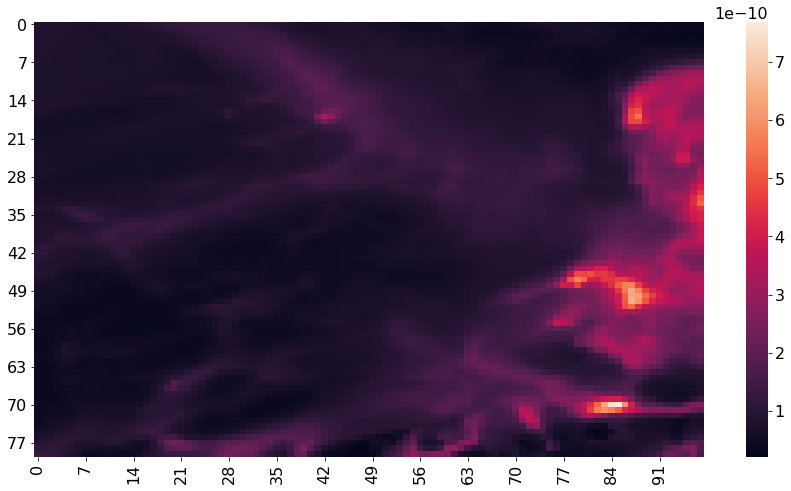

In [12]:
sns.heatmap(ds['ecff_conc'][500,0,:,:])
fig = plt.gcf()
fig.set_size_inches(15,8)